In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Code that generates the lagitude and longitude. 
# First we need to store se we can acess them later
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
#print(coordinates)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Next, we need to iterate through our list of cities
# and begin building the URL for each city, 
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | portland
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | impfondo
Processing Record 9 of Set 1 | la uribe
City not found. Skipping...
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | phuket
Processing Record 13 of Set 1 | kiunga
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | leshukonskoye
Processing Record 16 of Set 1 | namibe
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | sibolga
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | goya
Proce

Processing Record 39 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 4 | sao filipe
Processing Record 41 of Set 4 | viedma
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | jishou
Processing Record 44 of Set 4 | vardo
Processing Record 45 of Set 4 | calama
Processing Record 46 of Set 4 | termiz
Processing Record 47 of Set 4 | terenga
City not found. Skipping...
Processing Record 48 of Set 4 | maxixe
Processing Record 49 of Set 4 | mehamn
Processing Record 50 of Set 4 | tiksi
Processing Record 1 of Set 5 | saint-paul
Processing Record 2 of Set 5 | beringovskiy
Processing Record 3 of Set 5 | verkhnevilyuysk
Processing Record 4 of Set 5 | djenne
Processing Record 5 of Set 5 | taywarah
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | lavrentiya
Processing Record 8 of Set 5 | taoudenni
Processing Record 9 of Set 5 | keelung
Processing Record 10 of Set 5 | muncar
Processing Record 11 of Set 5 | port blair
Processing Reco

Processing Record 22 of Set 8 | castro
Processing Record 23 of Set 8 | xiaoweizhai
Processing Record 24 of Set 8 | haines junction
Processing Record 25 of Set 8 | pitimbu
Processing Record 26 of Set 8 | deputatskiy
Processing Record 27 of Set 8 | hervey bay
Processing Record 28 of Set 8 | north bend
Processing Record 29 of Set 8 | angoram
Processing Record 30 of Set 8 | tambura
Processing Record 31 of Set 8 | south shields
Processing Record 32 of Set 8 | coquimbo
Processing Record 33 of Set 8 | sangar
Processing Record 34 of Set 8 | santa maria
Processing Record 35 of Set 8 | kattivakkam
Processing Record 36 of Set 8 | aksu
Processing Record 37 of Set 8 | wanaka
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | fort nelson
Processing Record 40 of Set 8 | bathsheba
Processing Record 41 of Set 8 | san juan
Processing Record 42 of Set 8 | tairua
Processing Record 43 of Set 8 | plouzane
Processing Record 44 of Set 8 | xining
Processing Record 45 of Set 8 | kurumkan


Processing Record 15 of Set 12 | atbasar
Processing Record 16 of Set 12 | iberia
Processing Record 17 of Set 12 | vestmannaeyjar
Processing Record 18 of Set 12 | cap malheureux
Processing Record 19 of Set 12 | asyut
Processing Record 20 of Set 12 | boende
Processing Record 21 of Set 12 | buchanan
Processing Record 22 of Set 12 | chapada dos guimaraes
Processing Record 23 of Set 12 | salisbury
Processing Record 24 of Set 12 | sisimiut
Processing Record 25 of Set 12 | denia
Processing Record 26 of Set 12 | kenai
Processing Record 27 of Set 12 | lovozero
Processing Record 28 of Set 12 | dois vizinhos
Processing Record 29 of Set 12 | baghdad
Processing Record 30 of Set 12 | tawzar
City not found. Skipping...
Processing Record 31 of Set 12 | kaitong
Processing Record 32 of Set 12 | dunshaughlin
Processing Record 33 of Set 12 | nago
Processing Record 34 of Set 12 | rosarito
Processing Record 35 of Set 12 | athabasca
Processing Record 36 of Set 12 | bagdarin
Processing Record 37 of Set 12 | n

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,68.49,44,100,10.13,NZ,2021-12-15 00:37:32
1,Alofi,-19.0595,-169.9187,84.09,65,40,10.36,NU,2021-12-15 00:37:33
2,Albany,42.6001,-73.9662,38.30,63,97,3.60,US,2021-12-15 00:36:13
3,Portland,45.5234,-122.6762,43.38,83,90,1.01,US,2021-12-15 00:34:35
4,Khatanga,71.9667,102.5000,-5.89,93,100,3.96,RU,2021-12-15 00:37:33
5,Busselton,-33.6500,115.3333,67.05,48,0,2.57,AU,2021-12-15 00:36:15
6,Rikitea,-23.1203,-134.9692,78.55,70,18,4.88,PF,2021-12-15 00:37:34
7,Impfondo,1.6381,18.0667,76.26,73,100,2.66,CG,2021-12-15 00:37:34
8,Hobart,-42.8794,147.3294,73.11,71,40,9.22,AU,2021-12-15 00:37:34
9,Avarua,-21.2078,-159.7750,84.25,79,40,11.50,CK,2021-12-15 00:37:35


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,100,NZ,2021-12-15 00:37:32,44,-46.1927,168.8643,68.49,10.13
1,Alofi,40,NU,2021-12-15 00:37:33,65,-19.0595,-169.9187,84.09,10.36
2,Albany,97,US,2021-12-15 00:36:13,63,42.6001,-73.9662,38.30,3.60
3,Portland,90,US,2021-12-15 00:34:35,83,45.5234,-122.6762,43.38,1.01
4,Khatanga,100,RU,2021-12-15 00:37:33,93,71.9667,102.5000,-5.89,3.96


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

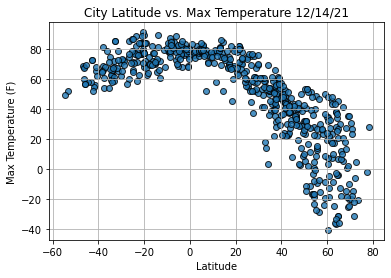

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

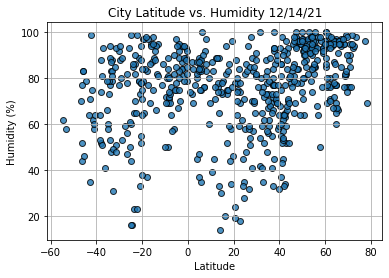

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

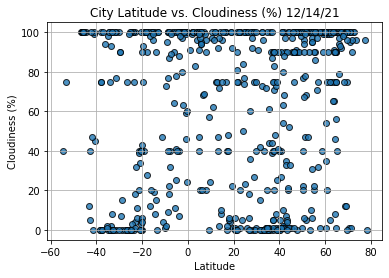

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

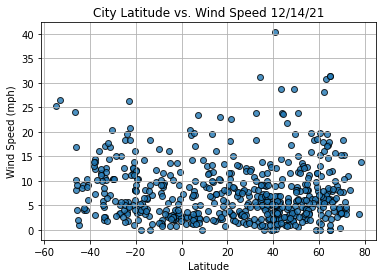

In [23]:
# for stem project
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()